MCA plots including data interfered by sms

In [8]:
def ishigaya_event_noise_check_plot(date_range, time_limit, data_time, del_sms_interference):
    import load
    import pyspedas
    from pytplot import options, tlimit, timebar, store_data, get_data, tplot_options
    from pytplot.MPLPlotter.tplot import tplot
    import numpy as np

    value_type = 'max'
    center_freq_list = [3.16, 5.62, 10, 17.8,
                        31.6, 56.2, 100, 178,
                        316, 562, 1000, 1780,
                        3160, 5620, 10000, 17800]

    freq_range_idx = [6, 10]
    j = freq_range_idx[0]
    freq_label = []
    while j < freq_range_idx[1]+1:
        freq_label = freq_label + [str(center_freq_list[j])+' Hz']
        j = j + 1

    load.orb(date_range)
    if del_sms_interference == 'off':
        load.mca(date_range, del_invalid_data=['off', 'noisy', 'bit rate m', 'pws', 'bdr'])
    if del_sms_interference == 'on':
        load.mca(date_range, del_invalid_data=['off', 'noisy', 'sms', 'bit rate m', 'pws', 'bdr'])
    postgap = get_data('PostGap')
    postgap_array = np.empty([postgap.y.size, 6])
    for i in range(postgap.y.size):
        postgap_str = format(postgap.y[i], '08b')
        #"off"               "noisy",             "BDR",               "SMS",               "Bit rate",          "PWS",
        postgap_array[i][0], postgap_array[i][1], postgap_array[i][2], postgap_array[i][3], postgap_array[i][4], postgap_array[i][5] = \
        int(postgap_str[7]), int(postgap_str[6])+0.1, int(postgap_str[3])+0.2, int(postgap_str[2])+0.3, int(postgap_str[1])+0.4, int(postgap_str[0])+0.5

    B_tvar = get_data('B'+value_type+'_pwr')
    B_array = B_tvar.y.T
    B_array_lines = B_array[freq_range_idx[0]:freq_range_idx[1]+1]
    store_data('B'+value_type+'_pwr_lines', data={'x':B_tvar.times, 'y':B_array_lines.T})
    store_data('Inst_flag', data = {'x':postgap.times, 'y':postgap_array})
    options('B'+value_type+'_pwr_lines', opt_dict={'ylog':True, 'legend_names':freq_label, 'legend_location':'spedas', 'ytitle':'Magnetic field \n [pT^2/Hz]',
                                'yrange':[1e-8, 1], 'color':['r', 'orangered', 'y', 'g', 'b'], 'marker':'.'})

    E_tvar = get_data('E'+value_type+'_pwr')
    E_array = E_tvar.y.T
    E_array_lines = E_array[freq_range_idx[0]:freq_range_idx[1]+1]
    store_data('E'+value_type+'_pwr_lines', data={'x':E_tvar.times, 'y':E_array_lines.T})
    options('E'+value_type+'_pwr_lines', opt_dict={'ylog':True, 'legend_names':freq_label, 'legend_location':'spedas', 'ytitle':'Electric field \n [pT^2/Hz]',
                                'yrange':[1e-10, 10], 'color':['r', 'sandybrown', 'y', 'g', 'b']})

    options('Inst_flag', opt_dict={'yrange':[-0.3, 1.5], 'panel_size':0.3})
    options('Inst_flag', opt_dict={'legend_names':['off', 'noisy', 'BDR', 'SMS', 'Bit rate M', 'PWS'], 'legend_location':'spedas'})
    options('B'+value_type+'_pwr', opt_dict={'spec':True, 'ylog':True, 'ytitle':'Frequency [Hz]', 'yrange':[1, 20000], 'zlog':True, 'ztitle':'Magnetic field \n [pT^2/Hz]', 'zrange':[1e-8,1e6], 'colormap':'viridis', 'char_size':18})
    options('E'+value_type+'_pwr', opt_dict={'spec':True, 'ylog':True, 'ytitle':'Frequency [Hz]', 'yrange':[1, 20000], 'zlog':True, 'ztitle':'Electric field \n [(mV/m)^2/Hz]', 'zrange':[1e-10,10], 'colormap':'viridis', 'char_size':18})
    tlimit(time_limit)
    timebar(data_time, varname=['E'+value_type+'_pwr', 'B'+value_type+'_pwr', 'B'+value_type+'_pwr_lines','Inst_flag'], thick=2)

    timebar([6.65566819e-06, 5.28678516e-03, 4.19944273e+00], varname='E'+value_type+'_pwr_lines', databar=True, color='r')
    timebar([4.71131812e-06, 7.46693601e-04, 1.48984960e+00], varname='E'+value_type+'_pwr_lines', databar=True, color='sandybrown')
    timebar([2.64776078e-06, 2.64776078e-04, 5.28297731e-01], varname='E'+value_type+'_pwr_lines', databar=True, color='y')
    timebar([1.18156806e-06, 7.45519046e-05, 1.87265918e-01], varname='E'+value_type+'_pwr_lines', databar=True, color='g')
    timebar([4.19944273e-07, 2.64966923e-05, 5.28678516e-02], varname='E'+value_type+'_pwr_lines', databar=True, color='lime')
    timebar([1.48984960e-07, 7.46693601e-06, 1.87560953e-02], varname='E'+value_type+'_pwr_lines', databar=True, color='b')

    pyspedas.tinterpol('akb_ILAT', interp_to='Emax_pwr', newname = 'ILAT')
    pyspedas.tinterpol('akb_MLAT', interp_to = 'Emax', newname = 'MLAT')
    pyspedas.tinterpol('akb_MLT', interp_to = 'Emax', newname = 'MLT', method='nearest')
    pyspedas.tinterpol('akb_ALT', interp_to = 'Emax', newname = 'ALT')

    options('ALT', opt_dict={'ytitle':'ALT [km]', 'ybar_size':20})
    options('MLT', opt_dict={'ytitle':'MLT [hr]', 'ybar_size':20})
    options('ILAT', opt_dict={'ytitle':'ILAT [deg]', 'ybar_size':20})
    tplot_options('axis_font_size', 14)
    #tplot(['Eave_pwr', 'Eave_pwr_100_3160','Bave_pwr', 'Bave_pwr_100_3160', 'Inst_flag'], xsize=8, ysize=14)
    tplot(['E'+value_type+'_pwr', 'B'+value_type+'_pwr'],var_label= ['ALT', 'MLT', 'ILAT'], xsize=10, ysize=14)

date_range_list = [['1990-02-12', '1990-02-13'],
                   ['1990-02-11', '1990-02-12'],
                    ['1990-03-06', '1990-03-07'],
                    ['1990-02-17', '1990-02-18'],
                    ['1990-02-25', '1990-02-26'],
                    ['1990-02-25', '1990-02-26'],
                    ['1990-03-02', '1990-03-03']]
time_limit_list = [['1990-02-12 0:45:00', '1990-02-12 1:30:00'],
                   ['1990-02-11 18:00:00', '1990-02-11 18:15:00'],
                   ['1990-03-06 14:00:00', '1990-03-06 14:15:00'],
                   ['1990-02-17 03:40:00', '1990-02-17 03:55:00'],
                   ['1990-02-25 12:20:00', '1990-02-25 12:35:00'],
                   ['1990-02-25 15:40:00', '1990-02-25 15:55:00'],
                   ['1990-03-02 14:50:00', '1990-03-02 15:05:00']]
event_time_list =  [['1990-02-11 18:05:39', '1990-02-11 18:07:15'],
                    ['1990-02-11 18:05:39', '1990-02-11 18:07:15'],
                ['1990-03-06 14:07:56', '1990-03-06 14:07:56'],
                ['1990-02-17 03:49:30', '1990-02-17 03:47:48'],
                ['1990-02-25 12:22:30', '1990-02-25 12:23:00'],
                ['1990-02-25 15:51:32', '1990-02-25 15:51:32'],
                ['1990-03-02 14:54:28', '1990-03-02 14:55:40']]
for i in range(7):
    ishigaya_event_noise_check_plot(date_range_list[i], time_limit_list[i], event_time_list[i], del_sms_interference='on')
#ishigaya_event_noise_check_plot(date_range_list[1], time_limit_list[1], event_time_list[1], del_sms_interference='on')
#ishigaya_event_noise_check_plot(date_range_list[6], time_limit_list[6], event_time_list[6], del_sms_interference='on')


KeyboardInterrupt: 

In [ ]:
import pyspedas, pytplot, load
from pytplot import get_data
import numpy as np
from calc_coldplasma_dispersion_relation import dispersion
import matplotlib.pyplot as plt
q = 1.602176634e-19
eps = 8.8541878128e-12
me = 9.1e-31
mh = 1.7e-27
mhe = 6.7e-27
mo = 2.7e-26
tranges = [['1990-02-11', '1990-02-12'],
           ['1990-03-06', '1990-03-07'],
           ['1990-02-17', '1990-02-18'],
           ['1990-02-25', '1990-02-26'],
           ['1990-02-25', '1990-02-26'],
           ['1990-03-02', '1990-03-03']]

event_times =  [pyspedas.time_double('1990-02-11 18:05:39'),pyspedas.time_double('1990-02-11 18:07:15'),
                pyspedas.time_double('1990-03-06 14:07:56'),pyspedas.time_double('1990-03-06 14:07:56'),
                pyspedas.time_double('1990-02-17 03:49:30'),pyspedas.time_double('1990-02-17 03:47:48'),
                pyspedas.time_double('1990-02-25 12:22:30'),pyspedas.time_double('1990-02-25 12:23:00'),
                pyspedas.time_double('1990-02-25 15:51:32'),pyspedas.time_double('1990-02-25 15:51:32'),
                pyspedas.time_double('1990-03-02 14:54:28'),pyspedas.time_double('1990-03-02 14:55:40')]

nes = [60e6, 71e6, 128e6, 225e6, 173e6, 47e6]
ion_ratio =  [[0.46, 0.11, 0.43],
              [0.30, 0.06, 0.64],
              [0.24, 0.08, 0.68],
              [0.14, 0.10, 0.76],
              [0.32, 0.19, 0.56],
              [0.29, 0.19, 0.52]]

Vph_obs = []
Vph_dr  = []
Vph_ratio = []
Eobs = []
Bobs = []
event_time_list = []
for i in range(6):
    trange = tranges[i]
    event_time1 = pyspedas.time_double(event_times[2*i])
    event_time2 = pyspedas.time_double(event_times[2*i+1])

    ne = nes[i]
    nh = ne*ion_ratio[i][0]
    nhe= ne*ion_ratio[i][1]
    no = ne*ion_ratio[i][2]

    load.mca(trange, del_invalid_data=['off', 'noisy', 'sms', 'bdr', 'bit rate m', 'pws'])
    load.orb(trange)
    tplot_names = ['Emax', 'Eave', 'Bmax', 'Bave']
    for j in range(4):
        tplot_variable = pytplot.get_data(tplot_names[j])
        tplot_variable_float = (tplot_variable.y).astype(float)
        np.place(tplot_variable_float, tplot_variable_float == 254, np.nan)
        tplot_variable_0dB = 1e-6 #mV or pT
        bandwidth = tplot_variable.v * 0.3
        tplot_variable_amplitude = (10**(tplot_variable_float/20)) * (tplot_variable_0dB)
        tplot_variable_power = (10**(tplot_variable_float/10)) * ((tplot_variable_0dB)**2)
        pytplot.store_data(tplot_names[j] +'_Amp', data={'x': tplot_variable.times, 'y': tplot_variable_amplitude, 'v': tplot_variable.v})
        pytplot.store_data(tplot_names[j] +'_Pwr', data={'x': tplot_variable.times, 'y': tplot_variable_power, 'v': tplot_variable.v})

    Eamp = pytplot.get_data('Emax_Amp')
    Epwr = pytplot.get_data('Emax_Pwr')

    Bamp = pytplot.get_data('Bmax_Amp')

    Times = Eamp.times

    pyspedas.tinterpol('akb_Bmdl_X', interp_to='Emax_Pwr', newname = 'Bmdl_x')
    pyspedas.tinterpol('akb_Bmdl_Y', interp_to='Emax_Pwr', newname = 'Bmdl_y')
    pyspedas.tinterpol('akb_Bmdl_Z', interp_to='Emax_Pwr', newname = 'Bmdl_z')

    Bx = pytplot.get_data('Bmdl_x')
    By = pytplot.get_data('Bmdl_y')
    Bz = pytplot.get_data('Bmdl_z')
    B = np.sqrt(Bx.y**2 + By.y**2 + Bz.y**2) * 1e-9


    Epwr_10Hz = Epwr.y.T[2]

    idx1 = np.argmin(np.abs(Times - event_time1))
    idx2 = np.argmin(np.abs(Times - event_time2))

    Eamp = [Eamp.y[idx1], Eamp.y[idx2]]
    Bamp = [Bamp.y[idx1], Bamp.y[idx2]]

    B0 = [B[idx1], B[idx2]]

    pi_e = (ne*q**2/(eps*me))**0.5
    pi_h = (nh*q**2/(eps*mh))**0.5
    pi_he = (nhe*q**2/(eps*mhe))**0.5
    pi_o = (no*q**2/(eps*mo))**0.5

    omega_e = -q*B0[0]/me

    wlh = (((pi_h)**2+(pi_he)**2+(pi_o)**2)/(1+(pi_e/omega_e)**2))**0.5
    print(wlh/(2*np.pi))
    freq_range = Epwr.v
    w_range = 2*np.pi*freq_range
    print(pyspedas.time_string(Times[idx1], fmt='%Y-%m-%d %H:%M:%S'), pyspedas.time_string(Times[idx2], fmt='%Y-%m-%d %H:%M:%S'))
    event_time_list.append([pyspedas.time_string(Times[idx1], fmt='%Y-%m-%d %H:%M:%S'), pyspedas.time_string(Times[idx2], fmt='%Y-%m-%d %H:%M:%S')])
    theta = np.deg2rad(0)
    for k in range(2):
        kL1, kL2, kR1, kR2, kl1, kl2 = dispersion(theta, w_range, ne, nh, nhe, no, B0[k])
        Vph_dr.append((w_range/kR2).tolist())
        Vph_obs.append((Eamp[k]/Bamp[k] *1e9).tolist())
        Eobs.append(Eamp[k].tolist())
        Bobs.append(Bamp[k].tolist())


04-Dec-22 16:59:46: /usr/local/lib/python3.8/dist-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),

04-Dec-22 16:59:47: /Document/Akebono_analysis/VLF_mca/calc_coldplasma_dispersion_relation.py:71: RuntimeWarning: invalid value encountered in cdouble_scalars
  Ex_to_Ey1 = j*d*(p - N1*(np.sin(theta))**2)/(s*p - s*N1*(np.sin(theta))**2 - p*N1*(np.cos(theta))**2)



tinterpol (linear) was applied to: Bmdl_x
tinterpol (linear) was applied to: Bmdl_y
tinterpol (linear) was applied to: Bmdl_z
1112.5551346605491
1990-02-11 18:05:40 1990-02-11 18:07:16


04-Dec-22 16:59:47: /Document/Akebono_analysis/VLF_mca/calc_coldplasma_dispersion_relation.py:71: RuntimeWarning: invalid value encountered in cdouble_scalars
  Ex_to_Ey1 = j*d*(p - N1*(np.sin(theta))**2)/(s*p - s*N1*(np.sin(theta))**2 - p*N1*(np.cos(theta))**2)



tinterpol (linear) was applied to: Bmdl_x
tinterpol (linear) was applied to: Bmdl_y
tinterpol (linear) was applied to: Bmdl_z
943.9806788182502
1990-03-06 14:07:56 1990-03-06 14:07:56


04-Dec-22 16:59:48: /Document/Akebono_analysis/VLF_mca/calc_coldplasma_dispersion_relation.py:71: RuntimeWarning: invalid value encountered in cdouble_scalars
  Ex_to_Ey1 = j*d*(p - N1*(np.sin(theta))**2)/(s*p - s*N1*(np.sin(theta))**2 - p*N1*(np.cos(theta))**2)



tinterpol (linear) was applied to: Bmdl_x
tinterpol (linear) was applied to: Bmdl_y
tinterpol (linear) was applied to: Bmdl_z
1058.5842431479944
1990-02-17 03:49:32 1990-02-17 03:47:48


04-Dec-22 16:59:49: /Document/Akebono_analysis/VLF_mca/calc_coldplasma_dispersion_relation.py:71: RuntimeWarning: invalid value encountered in cdouble_scalars
  Ex_to_Ey1 = j*d*(p - N1*(np.sin(theta))**2)/(s*p - s*N1*(np.sin(theta))**2 - p*N1*(np.cos(theta))**2)



tinterpol (linear) was applied to: Bmdl_x
tinterpol (linear) was applied to: Bmdl_y
tinterpol (linear) was applied to: Bmdl_z
1168.991038088252
1990-02-25 12:22:28 1990-02-25 12:23:00


04-Dec-22 16:59:49: /Document/Akebono_analysis/VLF_mca/calc_coldplasma_dispersion_relation.py:71: RuntimeWarning: invalid value encountered in cdouble_scalars
  Ex_to_Ey1 = j*d*(p - N1*(np.sin(theta))**2)/(s*p - s*N1*(np.sin(theta))**2 - p*N1*(np.cos(theta))**2)



tinterpol (linear) was applied to: Bmdl_x
tinterpol (linear) was applied to: Bmdl_y
tinterpol (linear) was applied to: Bmdl_z
1440.272983201852
1990-02-25 15:51:32 1990-02-25 15:51:32


04-Dec-22 16:59:50: /Document/Akebono_analysis/VLF_mca/calc_coldplasma_dispersion_relation.py:71: RuntimeWarning: invalid value encountered in cdouble_scalars
  Ex_to_Ey1 = j*d*(p - N1*(np.sin(theta))**2)/(s*p - s*N1*(np.sin(theta))**2 - p*N1*(np.cos(theta))**2)



tinterpol (linear) was applied to: Bmdl_x
tinterpol (linear) was applied to: Bmdl_y
tinterpol (linear) was applied to: Bmdl_z
815.3000073947256
1990-03-02 14:54:28 1990-03-02 14:55:40


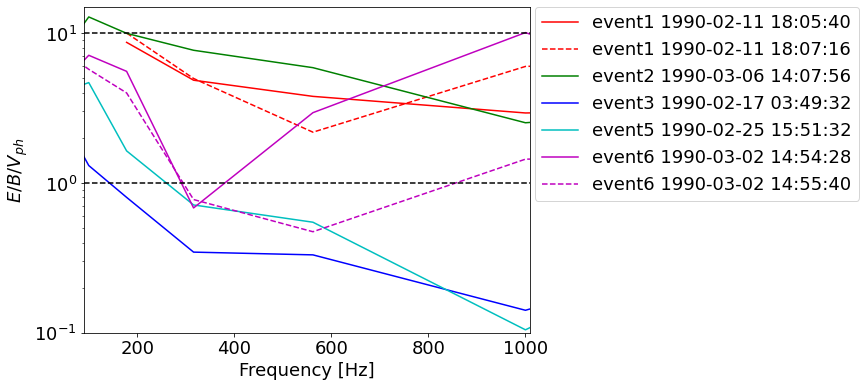

In [ ]:

Vph_ratio = np.array(Vph_obs)/np.array(Vph_dr)
colorlist = ["r", "g", "b", "c", "m", "y"]
plt.figure(figsize=(8, 6))
plt.rcParams['font.size'] = 18

plt.plot(freq_range, Vph_ratio[0], label='event1' + ' ' + event_time_list[0][0], color=colorlist[0])
plt.plot(freq_range, Vph_ratio[1], label='event1' + ' ' + event_time_list[0][1], color=colorlist[0], linestyle='dashed')
plt.plot(freq_range, Vph_ratio[2], label='event2' + ' ' + event_time_list[1][0], color=colorlist[1])
plt.plot(freq_range, Vph_ratio[4], label='event3' + ' ' + event_time_list[2][0], color=colorlist[2])
plt.plot(freq_range, Vph_ratio[8], label='event5' + ' ' + event_time_list[4][0], color=colorlist[3])
plt.plot(freq_range, Vph_ratio[10], label='event6' + ' ' + event_time_list[5][0], color=colorlist[4])
plt.plot(freq_range, Vph_ratio[11], label='event6' + ' ' + event_time_list[5][1], color=colorlist[4], linestyle='dashed')
'''
plt.plot(freq_range, Vph_ratio[0], label='event1', color=colorlist[0])
plt.plot(freq_range, Vph_ratio[1], label='event1', color=colorlist[0], linestyle='dashed')
plt.plot(freq_range, Vph_ratio[2], label='event2', color=colorlist[1])
plt.plot(freq_range, Vph_ratio[4], label='event3', color=colorlist[2])
plt.plot(freq_range, Vph_ratio[8], label='event5', color=colorlist[3])
plt.plot(freq_range, Vph_ratio[10], label='event6', color=colorlist[4])
plt.plot(freq_range, Vph_ratio[11], label='event6', color=colorlist[4], linestyle='dashed')
'''
#plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'$E/B / V_{ph}$')
plt.ylim(0.1,15)
plt.xlim(90, 1010)
plt.hlines(1, xmin=90, xmax=1010, colors='k', linestyles='dashed')
plt.hlines(10, xmin=90, xmax=1010, colors='k', linestyles='dashed')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
#plt.title(str(np.rad2deg(theta)) + ' [rad]')


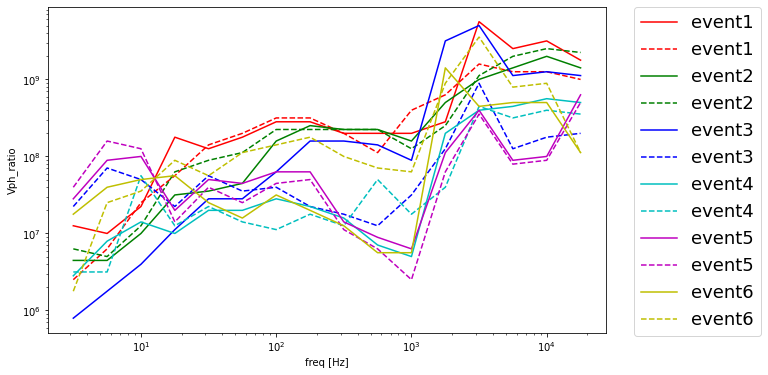

In [ ]:
colorlist = ["r", "g", "b", "c", "m", "y"]
plt.figure(figsize=(10, 6))
for i in range(6):
    plt.plot(freq_range, Vph_obs[2*i], label='event'+str(i+1), color=colorlist[i])
    plt.plot(freq_range, Vph_obs[2*i+1], label='event'+str(i+1), color=colorlist[i], linestyle='dashed')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('freq [Hz]')
plt.ylabel('Vph_ratio')


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)


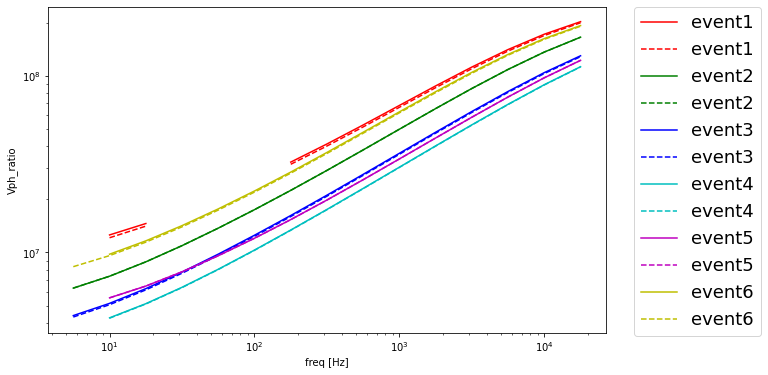

In [ ]:
colorlist = ["r", "g", "b", "c", "m", "y"]
plt.figure(figsize=(10, 6))
for i in range(6):
    plt.plot(freq_range, Vph_dr[2*i], label='event'+str(i+1), color=colorlist[i])
    plt.plot(freq_range, Vph_dr[2*i+1], label='event'+str(i+1), color=colorlist[i], linestyle='dashed')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('freq [Hz]')
plt.ylabel('Vph_ratio')


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)


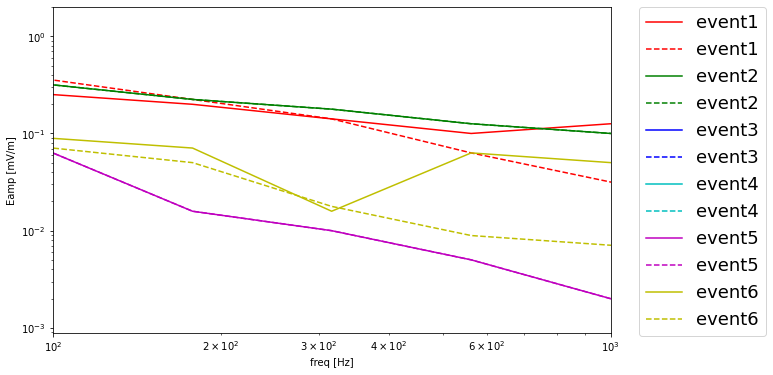

In [ ]:

colorlist = ["r", "g", "b", "c", "m", "y"]
plt.figure(figsize=(10, 6))
for i in range(6):
    plt.plot(freq_range, Eobs[2*i], label='event'+str(i+1), color=colorlist[i])
    plt.plot(freq_range, Eobs[2*i+1], label='event'+str(i+1), color=colorlist[i], linestyle='dashed')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('freq [Hz]')
plt.ylabel('Eamp [mV/m]')
plt.xlim(100, 1000)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)


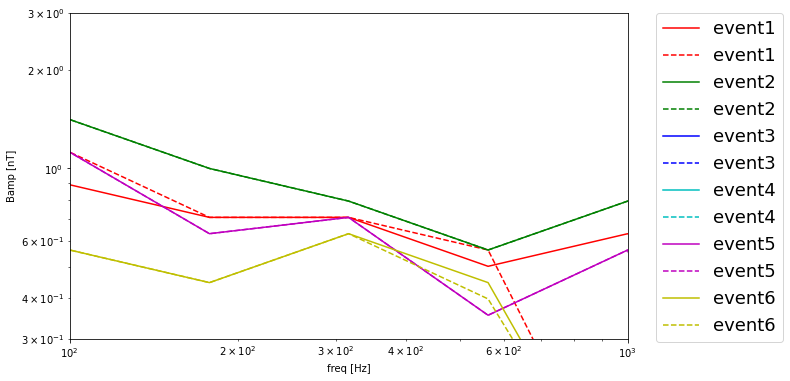

In [ ]:
colorlist = ["r", "g", "b", "c", "m", "y"]
plt.figure(figsize=(10, 6))
for i in range(6):
    plt.plot(freq_range, Bobs[2*i], label='event'+str(i+1), color=colorlist[i])
    plt.plot(freq_range, Bobs[2*i+1], label='event'+str(i+1), color=colorlist[i], linestyle='dashed')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('freq [Hz]')
plt.ylabel('Bamp [nT]')
plt.xlim(100, 1000)
plt.ylim(0.3, 3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)


Ishigaya event plot

In [ ]:
import pyspedas, pytplot, load
from pytplot import get_data
import numpy as np
from calc_coldplasma_dispersion_relation import dispersion
import matplotlib.pyplot as plt

tranges = [['1990-02-11', '1990-02-12'],
           ['1990-03-06', '1990-03-07'],
           ['1990-02-17', '1990-02-18'],
           ['1990-02-25', '1990-02-26'],
           ['1990-02-25', '1990-02-26'],
           ['1990-03-02', '1990-03-03']]

event_times =  [pyspedas.time_double('1990-02-11 18:05:39'),
                pyspedas.time_double('1990-02-11 18:07:15'),
                pyspedas.time_double('1990-03-06 14:06:20'),
                pyspedas.time_double('1990-03-06 14:07:56'),
                pyspedas.time_double('1990-02-17 03:45:56'),
                pyspedas.time_double('1990-02-17 03:47:48'),
                pyspedas.time_double('1990-02-25 12:22:44'),
                pyspedas.time_double('1990-02-25 12:23:00'),
                pyspedas.time_double('1990-02-25 15:49:32'),
                pyspedas.time_double('1990-02-25 15:51:24'),
                pyspedas.time_double('1990-03-02 14:54:04'),
                pyspedas.time_double('1990-03-02 14:54:44')]

nes = [60e6, 71e6, 128e6, 225e6, 173e6, 47e6]
ion_ratio =  [[0.46, 0.11, 0.43],
              [0.30, 0.06, 0.64],
              [0.24, 0.08, 0.68],
              [0.14, 0.10, 0.76],
              [0.32, 0.19, 0.56],
              [0.29, 0.19, 0.52]]

Vph_obs = []
Vph_dr  = []
Vph_ratio = []


for i in range(6):
    trange = tranges[i]
    event_time1 = pyspedas.time_double(event_times[2*i])
    event_time2 = pyspedas.time_double(event_times[2*i+1])

    load.mca(trange)
    load.orb(trange)
    tplot_names = ['Emax', 'Eave', 'Bmax', 'Bave']
    for j in range(4):
        tplot_variable = pytplot.get_data(tplot_names[j])
        tplot_variable_float = (tplot_variable.y).astype(float)
        np.place(tplot_variable_float, tplot_variable_float == 254, np.nan)
        tplot_variable_0dB = 1e-6 #mV or pT
        bandwidth = tplot_variable.v * 0.3
        tplot_variable_amplitude = (10**(tplot_variable_float/20)) * (tplot_variable_0dB)
        tplot_variable_power = (10**(tplot_variable_float/10)) * ((tplot_variable_0dB)**2)
        pytplot.store_data(tplot_names[j] +'_Amp', data={'x': tplot_variable.times, 'y': tplot_variable_amplitude, 'v': tplot_variable.v})
        pytplot.store_data(tplot_names[j] +'_Pwr', data={'x': tplot_variable.times, 'y': tplot_variable_power, 'v': tplot_variable.v})

    Eamp = pytplot.get_data('Emax_Amp')
    Epwr = pytplot.get_data('Emax_Pwr')

    Bamp = pytplot.get_data('Bmax_Amp')

    Times = Eamp.times
    #Time interpolate
    try:
        pyspedas.tinterpol('akb_ILAT', interp_to='Emax_Pwr', newname = 'ILAT')
    except:
        #with open('./akebono_orbit_error_day_list.txt', mode="a") as f:
        #       f.write(trange[0] + '\n')
        print('orbit file is not perfect')
        continue
    pyspedas.tinterpol('akb_MLAT', interp_to='Emax_Pwr', newname = 'MLAT')
    pyspedas.tinterpol('akb_Pass', interp_to='Emax_Pwr', newname = 'Pass', method = 'nearest')
    pyspedas.tinterpol('akb_ALT', interp_to='Emax_Pwr', newname = 'ALT')
    pyspedas.tinterpol('akb_MLT', interp_to='Emax_Pwr', newname = 'MLT', method = 'nearest')
    pytplot.tplot()


In [ ]:
import numpy as np

a = np.array([0, 5, 2, np.nan, 5])
maxIndex = [i for i, x in enumerate(a) if x == np.nanmax(a)]
print(maxIndex)    # [1, 4]


[1, 4]


In [ ]:
import pyspedas
import pytplot
from pytplot import get_data, store_data
import numpy as np
from load import mca, orb
import matplotlib.pyplot as plt

ILAT_min = 55
start_day_string = '1990-01-05'
start_day_time_double = pyspedas.time_double(start_day_string)
days = 180

seconds_per_day = 86400
day_list = []
for i in range(0, days+1):
    time_double = start_day_time_double + i * seconds_per_day
    day_list.append(pyspedas.time_string(time_double, fmt='%Y-%m-%d %H:%M:%S'))

Emax_pwr_10Hz_array = np.empty((0,0), float)
Emax_amp_176Hz_array = np.empty((0,0), float)
Emax_amp_316Hz_array = np.empty((0,0), float)
Emax_amp_562Hz_array = np.empty((0,0), float)

Bmax_amp_176Hz_array = np.empty((0,0), float)
Bmax_amp_316Hz_array = np.empty((0,0), float)
Bmax_amp_562Hz_array = np.empty((0,0), float)

E_to_B_176Hz_array = np.empty((0,0), float)
E_to_B_316Hz_array = np.empty((0,0), float)
E_to_B_562Hz_array = np.empty((0,0), float)

Emax_pwr_mean_fcH_fLH_array = np.empty((0,0), float)

for k in range(len(day_list)-1):

    trange = [day_list[k], day_list[k+1]]
    print(trange)
    try:
        mca(trange= trange)
    except Exception as e:
        print(e)
        continue
    try:
        orb(trange= trange)
    except Exception as e:
        print(e)
        #with open('./akebono_orbit_error_day_list.txt', mode="a") as f:
        #       f.write(trange[0] + '\n')

        #print('orbit file does not exists')
        continue

    tplot_names = pytplot.tplot_names(True)

    #dB to amplitude
    for i in range(4):
        tplot_variable = pytplot.get_data(tplot_names[i])
        tplot_variable_float = (tplot_variable.y).astype(float)
        np.place(tplot_variable_float, tplot_variable_float == 254, np.nan)
        tplot_variable_0dB = 1e-6 #mV or pT
        bandwidth = tplot_variable.v * 0.3
        tplot_variable_amplitude = (10**(tplot_variable_float/20)) * (tplot_variable_0dB)
        tplot_variable_power = (10**(tplot_variable_float/10)) * ((tplot_variable_0dB)**2)
        pytplot.store_data(tplot_names[i] +'_Amp', data={'x': tplot_variable.times, 'y': tplot_variable_amplitude, 'v': tplot_variable.v})
        pytplot.store_data(tplot_names[i] +'_Pwr', data={'x': tplot_variable.times, 'y': tplot_variable_power, 'v': tplot_variable.v})

    #Time interpolate
    try:
        pyspedas.tinterpol('akb_ILAT', interp_to='Emax_Pwr', newname = 'ILAT')
    except:
        #with open('./akebono_orbit_error_day_list.txt', mode="a") as f:
        #       f.write(trange[0] + '\n')
        print('orbit file is not perfect')
        continue
    pyspedas.tinterpol('akb_MLAT', interp_to='Emax_Pwr', newname = 'MLAT')
    pyspedas.tinterpol('akb_Pass', interp_to='Emax_Pwr', newname = 'Pass', method = 'nearest')
    pyspedas.tinterpol('akb_ALT', interp_to='Emax_Pwr', newname = 'ALT')
    pyspedas.tinterpol('akb_MLT', interp_to='Emax_Pwr', newname = 'MLT', method = 'nearest')
    #Limit ILAT range
    Emax = get_data('Emax_Pwr')
    time = Emax.times
    ILAT = get_data('ILAT')
    ILAT = ILAT.y
    MLAT = get_data('MLAT')
    MLAT = MLAT.y
    MLT = get_data('MLT')
    MLT = MLT.y

    Emax_pwr = get_data('Emax_Pwr')
    Emax_amp = get_data('Emax_Amp')
    Bmax_amp = get_data('Bmax_Amp')

    E_to_B = Emax_amp.y/Bmax_amp.y *1e9

    index_tuple = np.where((ILAT > 55)&(10 < MLT)&(MLT < 14))
    Emax_in_cusp = Emax_pwr.y[index_tuple[0]]
    Eamp_in_cusp = Emax_amp.y[index_tuple[0]]
    Bamp_in_cusp = Bmax_amp.y[index_tuple[0]]

    E_to_B_in_cusp = E_to_B[index_tuple[0]]

    Emax_10Hz = Emax_in_cusp.T[2]
    Eamp_176Hz_562Hz = Eamp_in_cusp.T[7:10]
    Bamp_176Hz_562Hz = Bamp_in_cusp.T[7:10]
    E_to_B_176Hz_562Hz = E_to_B_in_cusp.T[7:10]

    Index_over_th = [i for i, Emax_10Hz_var in enumerate(Emax_10Hz) if Emax_10Hz_var > 0.1]
    Emax_10Hz_over_th = Emax_10Hz[Index_over_th]

    Emax_176Hz = Eamp_176Hz_562Hz[0, Index_over_th]
    Emax_316Hz = Eamp_176Hz_562Hz[1, Index_over_th]
    Emax_562Hz = Eamp_176Hz_562Hz[2, Index_over_th]

    Bmax_176Hz = Bamp_176Hz_562Hz[0, Index_over_th]
    Bmax_316Hz = Bamp_176Hz_562Hz[1, Index_over_th]
    Bmax_562Hz = Bamp_176Hz_562Hz[2, Index_over_th]

    E_to_B_176Hz = E_to_B_176Hz_562Hz[0, Index_over_th]
    E_to_B_316Hz = E_to_B_176Hz_562Hz[1, Index_over_th]
    E_to_B_562Hz = E_to_B_176Hz_562Hz[2, Index_over_th]

    #Emax_mean_fch_fLH = np.nanmean(Emax_176Hz_562Hz[:, Index_over_th], axis = 0)

    Emax_pwr_10Hz_array = np.append(Emax_pwr_10Hz_array, Emax_10Hz_over_th)
    Emax_amp_176Hz_array = np.append(Emax_amp_176Hz_array, Emax_176Hz)
    Emax_amp_316Hz_array = np.append(Emax_amp_316Hz_array, Emax_316Hz)
    Emax_amp_562Hz_array = np.append(Emax_amp_562Hz_array, Emax_562Hz)

    Bmax_amp_176Hz_array = np.append(Bmax_amp_176Hz_array, Bmax_176Hz)
    Bmax_amp_316Hz_array = np.append(Bmax_amp_316Hz_array, Bmax_316Hz)
    Bmax_amp_562Hz_array = np.append(Bmax_amp_562Hz_array, Bmax_562Hz)

    E_to_B_176Hz_array = np.append(E_to_B_176Hz_array, E_to_B_176Hz)
    E_to_B_316Hz_array = np.append(E_to_B_316Hz_array, E_to_B_316Hz)
    E_to_B_562Hz_array = np.append(E_to_B_562Hz_array, E_to_B_562Hz)

    #Emax_pwr_mean_fcH_fLH_array = np.append(Emax_pwr_mean_fcH_fLH_array, Emax_mean_fch_fLH)


['1990-01-05 00:00:00', '1990-01-06 00:00:00']
tinterpol (linear) was applied to: ILAT
tinterpol (linear) was applied to: MLAT
tinterpol (nearest) was applied to: Pass
tinterpol (linear) was applied to: ALT
tinterpol (nearest) was applied to: MLT
['1990-01-06 00:00:00', '1990-01-07 00:00:00']
tinterpol (linear) was applied to: ILAT
tinterpol (linear) was applied to: MLAT
tinterpol (nearest) was applied to: Pass
tinterpol (linear) was applied to: ALT
tinterpol (nearest) was applied to: MLT
['1990-01-07 00:00:00', '1990-01-08 00:00:00']
tinterpol (linear) was applied to: ILAT
tinterpol (linear) was applied to: MLAT
tinterpol (nearest) was applied to: Pass
tinterpol (linear) was applied to: ALT
tinterpol (nearest) was applied to: MLT
['1990-01-08 00:00:00', '1990-01-09 00:00:00']
tinterpol (linear) was applied to: ILAT
tinterpol (linear) was applied to: MLAT
tinterpol (nearest) was applied to: Pass
tinterpol (linear) was applied to: ALT
tinterpol (nearest) was applied to: MLT
['1990-01-09

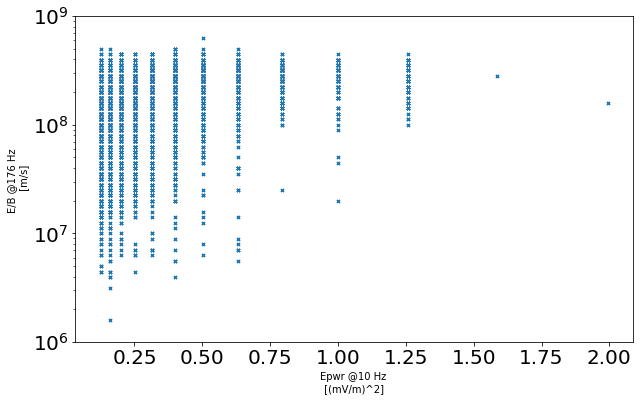

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(Emax_pwr_10Hz_array, E_to_B_176Hz_array, s=10, marker='x')
plt.xlabel('Epwr @10 Hz \n [(mV/m)^2] ')
plt.ylabel('E/B @176 Hz \n [m/s]')
plt.ylim(1e6, 1e9)
plt.yscale('log')
plt.xticks(fontsize =20)
plt.yticks(fontsize =20)

plt.show()


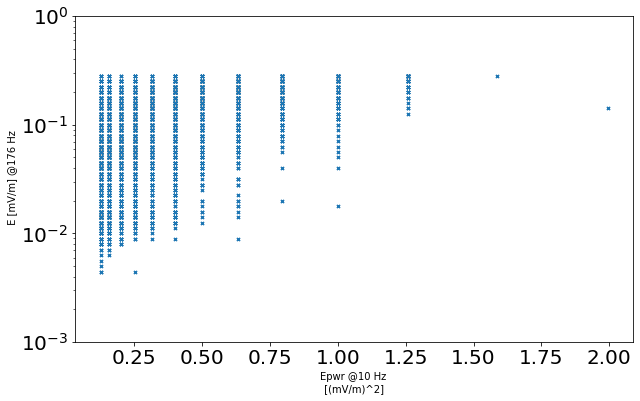

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(Emax_pwr_10Hz_array, Emax_amp_176Hz_array, s=10, marker='x')

plt.xlabel('Epwr @10 Hz \n [(mV/m)^2] ')
plt.ylabel(' E [mV/m] @176 Hz')
plt.ylim(1e-3, 1)
plt.yscale('log')
plt.xticks(fontsize =20)
plt.yticks(fontsize =20)

plt.show()


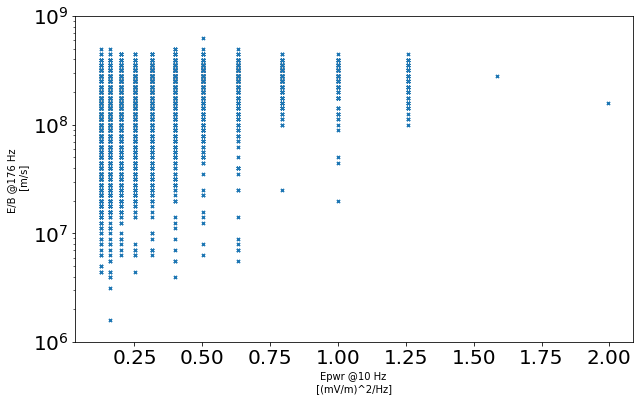

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(Emax_pwr_10Hz_array, E_to_B_176Hz_array, s=10, marker='x')
plt.xlabel('Epwr @10 Hz \n [(mV/m)^2/Hz] ')
plt.ylabel('E/B @176 Hz \n [m/s]')
plt.ylim(1e6, 1e9)
plt.yscale('log')
plt.xticks(fontsize =20)
plt.yticks(fontsize =20)
plt.savefig('output10')
plt.show()


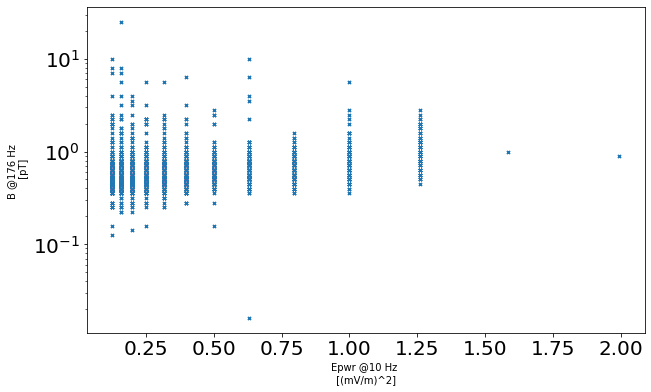

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(Emax_pwr_10Hz_array, Bmax_amp_176Hz_array, s=10, marker='x')
plt.xlabel('Epwr @10 Hz \n [(mV/m)^2] ')
plt.ylabel('B @176 Hz \n [pT]')
#plt.ylim(1e6, 1e9)
plt.yscale('log')
plt.xticks(fontsize =20)
plt.yticks(fontsize =20)
plt.show()


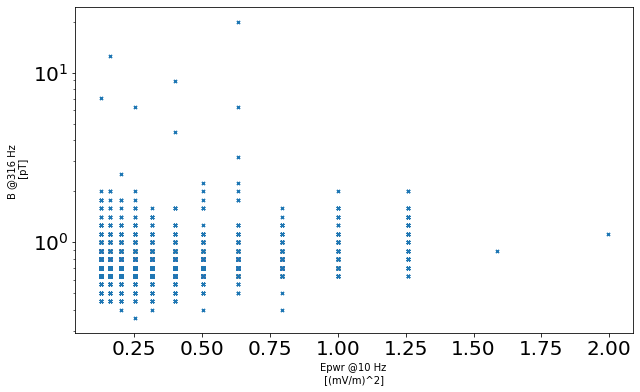

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(Emax_pwr_10Hz_array, Bmax_amp_316Hz_array, s=10, marker='x')
plt.xlabel('Epwr @10 Hz \n [(mV/m)^2] ')
plt.ylabel('B @316 Hz \n [pT]')
#plt.ylim(1e6, 1e9)
plt.yscale('log')
plt.xticks(fontsize =20)
plt.yticks(fontsize =20)
plt.show()


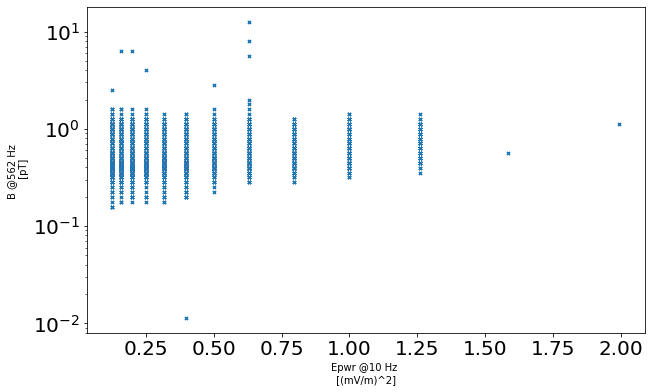

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(Emax_pwr_10Hz_array, Bmax_amp_562Hz_array, s=10, marker='x')
plt.xlabel('Epwr @10 Hz \n [(mV/m)^2] ')
plt.ylabel('B @562 Hz \n [pT]')
#plt.ylim(1e6, 1e9)
plt.yscale('log')
plt.xticks(fontsize =20)
plt.yticks(fontsize =20)
plt.show()


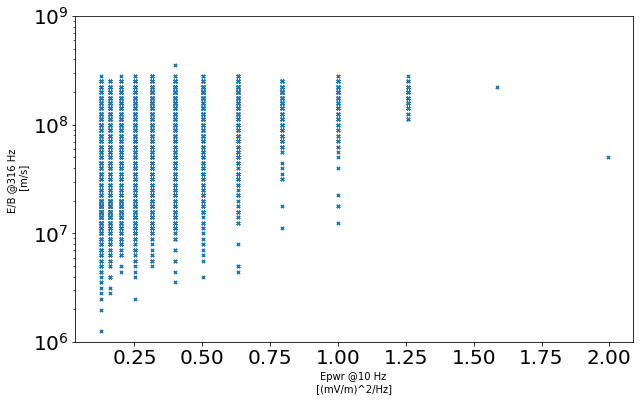

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(Emax_pwr_10Hz_array, E_to_B_316Hz_array, s=10, marker='x')
plt.xlabel('Epwr @10 Hz \n [(mV/m)^2/Hz] ')
plt.ylabel('E/B @316 Hz \n [m/s]')
plt.ylim(1e6, 1e9)
plt.yscale('log')
plt.xticks(fontsize =20)
plt.yticks(fontsize =20)
plt.savefig('output20')
plt.show()


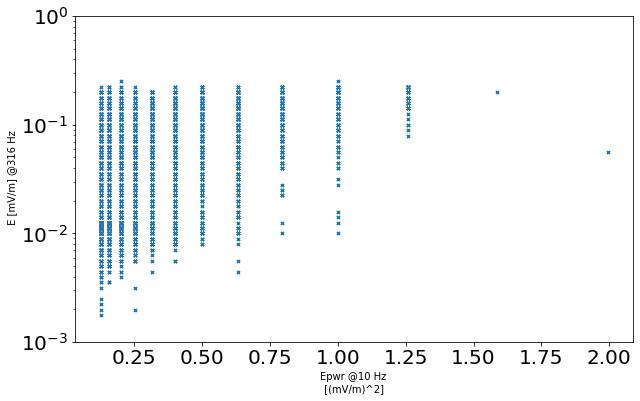

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(Emax_pwr_10Hz_array, Emax_amp_316Hz_array, s=10, marker='x')

plt.xlabel('Epwr @10 Hz \n [(mV/m)^2] ')
plt.ylabel(' E [mV/m] @316 Hz')
plt.ylim(1e-3, 1)
plt.yscale('log')
plt.xticks(fontsize =20)
plt.yticks(fontsize =20)

plt.show()


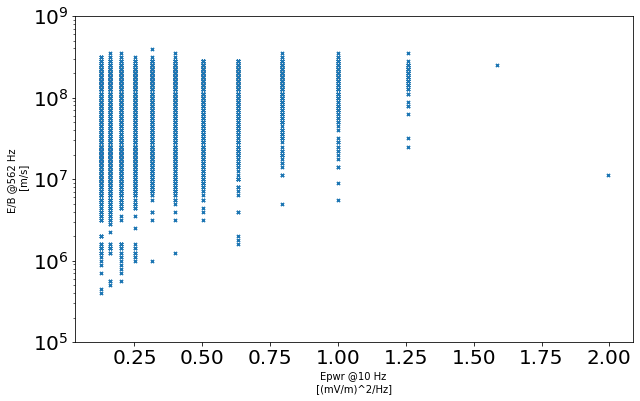

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(Emax_pwr_10Hz_array, E_to_B_562Hz_array, s=10, marker='x')
plt.xlabel('Epwr @10 Hz \n [(mV/m)^2/Hz] ')
plt.ylabel('E/B @562 Hz \n [m/s]')
plt.ylim(1e5, 1e9)
plt.yscale('log')
plt.xticks(fontsize =20)
plt.yticks(fontsize =20)
plt.savefig('output30')
plt.show()


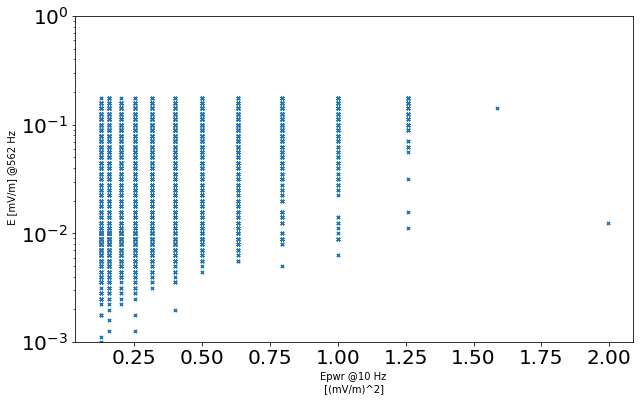

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(Emax_pwr_10Hz_array, Emax_amp_562Hz_array, s=10, marker='x')

plt.xlabel('Epwr @10 Hz \n [(mV/m)^2] ')
plt.ylabel(' E [mV/m] @562 Hz')
plt.ylim(1e-3, 1)
plt.yscale('log')
plt.xticks(fontsize =20)
plt.yticks(fontsize =20)

plt.show()


# An estimation of the doppler shift effect  



In [ ]:
import numpy as np
Ne = np.array([60, 71, 128, 225, 173, 47])*1e6
fpe = 9*np.sqrt(Ne)
H_number_ratio = np.array([0.46, 0.30, 0.24, 0.14, 0.32, 0.29])
H_vth = np.array([29.4, 33.9, 23.2, 24.2, 30.3, 57.7])*1e3
O_number_ratio = np.array([0.43, 0.64, 0.68, 0.76, 0.56, 0.52])
O_vth = np.array([6.09, 7.33, 6.86, 4.78, 7.07, 14.1])*1e3
vth = H_number_ratio*H_vth + O_number_ratio*O_vth
fcO = np.array([8.53, 5.62, 5.26, 6.39, 6.28, 5.76])
electron_skin_depth = 3e8 / (2*np.pi*fpe)
ion_gyro_radii = vth/(2*np.pi*fcO)

print('B0:', 2.7e-26*2*np.pi*fcO/1.602176634e-19)
print('fpe:', fpe)
print('vth:', vth)
print('electron skin depth:',electron_skin_depth)
print('ion gyro radius:', ion_gyro_radii)
print('shift:', 1/ion_gyro_radii*np.array([ 5.64,4.82,4.69,0, 4.98,4.89])*1e3)


B0: [9.03196550e-06 5.95072053e-06 5.56953558e-06 6.76603277e-06
 6.64955959e-06 6.09895912e-06]
fpe: [ 69713.70023173  75835.34795859 101823.37649086 135000.
 118376.51794169  61700.89140361]
vth: [16142.7 14861.2 10232.8  7020.8 13655.2 24065. ]
electron skin depth: [684.89382673 629.60722424 468.914748   353.67765132 403.34420844
 773.83781403]
ion gyro radius: [301.19466587 420.86004275 309.61990526 174.86620101 346.06569728
 664.94161554]
shift: [18.72543122 11.45273846 15.14760492  0.         14.3903312   7.35402911]


In [ ]:
help(vth)


Help on ndarray object:

class ndarray(builtins.object)
 |  ndarray(shape, dtype=float, buffer=None, offset=0,
 |          strides=None, order=None)
 |  
 |  An array object represents a multidimensional, homogeneous array
 |  of fixed-size items.  An associated data-type object describes the
 |  format of each element in the array (its byte-order, how many bytes it
 |  occupies in memory, whether it is an integer, a floating point number,
 |  or something else, etc.)
 |  
 |  Arrays should be constructed using `array`, `zeros` or `empty` (refer
 |  to the See Also section below).  The parameters given here refer to
 |  a low-level method (`ndarray(...)`) for instantiating an array.
 |  
 |  For more information, refer to the `numpy` module and examine the
 |  methods and attributes of an array.
 |  
 |  Parameters
 |  ----------
 |  (for the __new__ method; see Notes below)
 |  
 |  shape : tuple of ints
 |      Shape of created array.
 |  dtype : data-type, optional
 |      Any objec

## mca and mgf data analysis for Ishigaya Events

In [14]:
from calc_pwr_matrix_angle_vs_freq import make_wave_mgf_dataset
import pytplot
import akebono
date = '1990-2-11'
ds = make_wave_mgf_dataset(date=date, mca_datatype='pwr',
                           del_invalid_data=['off', 'bit rate m', 'sms', 'bdr', 'noisy'])
ds


<xarray.Dataset>
Dimensions:           (Epoch: 168444, dim0: 3, channel: 16)
Coordinates:
  * Epoch             (Epoch) datetime64[ns] 1990-02-11T00:00:00.118000 ... 1...
  * channel           (channel) float32 3.16 5.62 10.0 ... 1e+04 1.78e+04
Dimensions without coordinates: dim0
Data variables:
    B0_spin           (Epoch, dim0) float64 nan nan nan ... 3.014e+03 1.345e+03
    angle_b0_Ey       (Epoch) float64 nan nan nan nan ... 26.37 -26.64 -40.63
    angle_b0_sBy      (Epoch) float64 nan nan nan nan ... -129.5 -146.9 -155.9
    angle_b0_Bloop    (Epoch) float64 nan nan nan nan ... 131.4 124.9 112.0
    akb_mca_Emax_pwr  (Epoch, channel) float64 nan nan nan nan ... nan nan nan
    akb_mca_Bmax_pwr  (Epoch, channel) float64 nan nan nan nan ... nan nan nan
Attributes: (12/14)
    CATDESC:        Magnetic field
    DEPEND_0:       Epoch
    DICT_KEY:       MAGNETIC_FIELD > amplitude
    DISPLAY_TYPE:   time_series
    FIELDNAM:       Magnetic field
    FILLVAL:        [-1.e+31]
    ...             ...
    UNITS:          T
    VALIDMAX:       [0.01]
    VALIDMIN:       [-0.01]
    VAR_TYPE:       data
    standard_name:  Magnetic field
    units:          T

In [15]:
akebono.orb(trange=['1990-02-11', '1990-02-12'])


17-Oct-23 17:45:59: File is current: ../akebono_data/orbit/daily/199002/ED900211.txt


0 : akb_mca_Emax
1 : akb_mca_Eave
2 : akb_mca_Bmax
3 : akb_mca_Bave
4 : akb_mca_PostGap
5 : akb_mca_Emax_pwr
6 : akb_mca_Eave_pwr
7 : akb_mca_Bmax_pwr
8 : akb_mca_Bave_pwr
9 : akb_orb_geo
10 : akb_orb_gdlat
11 : akb_orb_gdlon
12 : akb_orb_inv
13 : akb_orb_fmlat
14 : akb_orb_mlat
15 : akb_orb_mlt
16 : akb_orb_alt
17 : akb_orb_gcalt
18 : akb_orb_gclat
19 : akb_orb_gclon
20 : akb_orb_bmdl_scaler
21 : angle_b0_Ey
22 : angle_b0_sBy
23 : angle_b0_Bloop
24 : angle_b0_B  data from:  angle_b0_sBy
25 : gyrofreq
26 : akb_mca_Epwr_ch1
27 : akb_mca_Epwr_ch2
28 : akb_mca_Epwr_ch3
29 : akb_mca_Epwr_ch4
30 : akb_mca_Epwr_ch5
31 : akb_mca_Epwr_ch6
32 : akb_mca_Epwr_ch7
33 : akb_mca_Epwr_ch8
34 : akb_mca_Epwr_ch9
35 : akb_mca_Epwr_ch10
36 : akb_mca_Epwr_ch11
37 : akb_mca_Epwr_ch12
38 : akb_mca_Epwr_ch13
39 : akb_mca_Epwr_ch14
40 : akb_mca_Epwr_ch15
41 : akb_mca_Epwr_ch16
42 : akb_mca_Bpwr_ch1
43 : akb_mca_Bpwr_ch2
44 : akb_mca_Bpwr_ch3
45 : akb_mca_Bpwr_ch4
46 : akb_mca_Bpwr_ch5
47 : akb_mca_Bpwr_ch6
48

['akb_orb_geo',
 'akb_orb_gdlat',
 'akb_orb_gdlon',
 'akb_orb_inv',
 'akb_orb_fmlat',
 'akb_orb_mlat',
 'akb_orb_mlt',
 'akb_orb_alt',
 'akb_orb_gcalt',
 'akb_orb_gclat',
 'akb_orb_gclon',
 'akb_orb_bmdl_scaler']

In [16]:
from plot_high_res_mca import store_angle_b0, store_gyrofreq

store_angle_b0(ds)
store_gyrofreq()


17-Oct-23 17:46:04: /home/onosawa/akebono_analysis/.venv/lib/python3.10/site-packages/pytplot/MPLPlotter/tplot.py:427: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  xaxis_ticks_dt = [np.datetime64(mpl.dates.num2date(tick_val).isoformat()) for tick_val in xaxis_ticks]

17-Oct-23 17:46:04: /home/onosawa/akebono_analysis/.venv/lib/python3.10/site-packages/pytplot/MPLPlotter/tplot.py:622: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  out_ticks.append('{:.2f}'.format(var_xr.interp(coords={'time': time}, kwargs={'fill_value': '

17-Oct-23 17:46:04: /home/onosawa/akebono_analysis/.venv/lib/python3.10/site-packages/pytplot/MPLPlotter/tplot.py:427: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  xaxis_ticks_dt = [np.datetime64(mpl.dates.num2date(tick_val).isoformat()) for tick_val in xaxis_ticks]

17-Oct-23 17:46:04: /home/onosawa/akebono_analysis/.venv/lib/python3.10/site-packages/pytplot/MPLPlotter/tplot.py:622: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  out_ticks.append('{:.2f}'.format(var_xr.interp(coords={'time': time}, kwargs={'fill_value': '

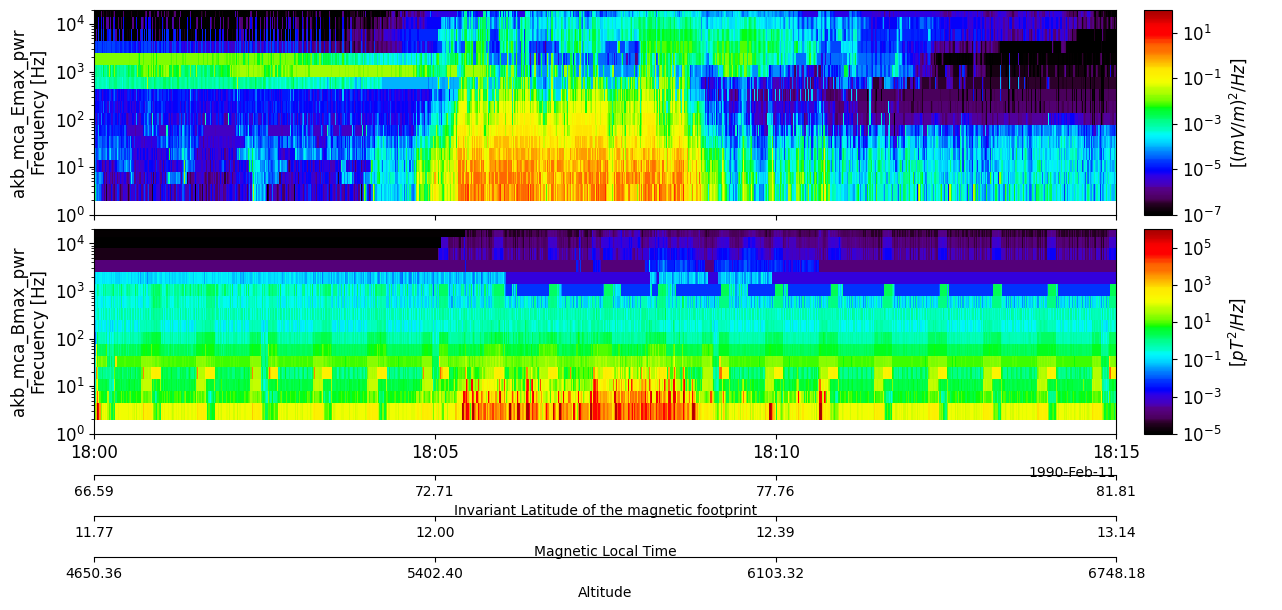

In [17]:
pytplot.tlimit(['1990-2-11 18:00:00', '1990-2-11 18:15:00'])
pytplot.options('akb_mca_Emax_pwr', 'zrange', [1e-7, 1e2])
pytplot.options('akb_mca_Bmax_pwr', 'zrange', [1e-5, 1e6])
pytplot.tplot(['akb_mca_Emax_pwr', 'akb_mca_Bmax_pwr'],
               var_label=['akb_orb_inv', 'akb_orb_mlt', 'akb_orb_alt'],
               xsize=14, ysize=8)


In [18]:
from store_mca_line import storeEpwrLines, storeBpwrLines

epwrXry = pytplot.get_data('akb_mca_Emax_pwr', xarray=True)
bpwrXry = pytplot.get_data('akb_mca_Bmax_pwr', xarray=True)

storeEpwrLines(epwrXry)
storeBpwrLines(bpwrXry)
pytplot.tplot_names()


(16,) (16,)
0 : akb_mca_Emax
1 : akb_mca_Eave
2 : akb_mca_Bmax
3 : akb_mca_Bave
4 : akb_mca_PostGap
5 : akb_mca_Emax_pwr
6 : akb_mca_Eave_pwr
7 : akb_mca_Bmax_pwr
8 : akb_mca_Bave_pwr
9 : akb_orb_geo
10 : akb_orb_gdlat
11 : akb_orb_gdlon
12 : akb_orb_inv
13 : akb_orb_fmlat
14 : akb_orb_mlat
15 : akb_orb_mlt
16 : akb_orb_alt
17 : akb_orb_gcalt
18 : akb_orb_gclat
19 : akb_orb_gclon
20 : akb_orb_bmdl_scaler
21 : angle_b0_Ey
22 : angle_b0_sBy
23 : angle_b0_Bloop
24 : angle_b0_B  data from:  angle_b0_sBy
25 : gyrofreq
26 : akb_mca_Epwr_ch1
27 : akb_mca_Epwr_ch2
28 : akb_mca_Epwr_ch3
29 : akb_mca_Epwr_ch4
30 : akb_mca_Epwr_ch5
31 : akb_mca_Epwr_ch6
32 : akb_mca_Epwr_ch7
33 : akb_mca_Epwr_ch8
34 : akb_mca_Epwr_ch9
35 : akb_mca_Epwr_ch10
36 : akb_mca_Epwr_ch11
37 : akb_mca_Epwr_ch12
38 : akb_mca_Epwr_ch13
39 : akb_mca_Epwr_ch14
40 : akb_mca_Epwr_ch15
41 : akb_mca_Epwr_ch16
42 : akb_mca_Bpwr_ch1
43 : akb_mca_Bpwr_ch2
44 : akb_mca_Bpwr_ch3
45 : akb_mca_Bpwr_ch4
46 : akb_mca_Bpwr_ch5
47 : akb_mca

['akb_mca_Emax',
 'akb_mca_Eave',
 'akb_mca_Bmax',
 'akb_mca_Bave',
 'akb_mca_PostGap',
 'akb_mca_Emax_pwr',
 'akb_mca_Eave_pwr',
 'akb_mca_Bmax_pwr',
 'akb_mca_Bave_pwr',
 'akb_orb_geo',
 'akb_orb_gdlat',
 'akb_orb_gdlon',
 'akb_orb_inv',
 'akb_orb_fmlat',
 'akb_orb_mlat',
 'akb_orb_mlt',
 'akb_orb_alt',
 'akb_orb_gcalt',
 'akb_orb_gclat',
 'akb_orb_gclon',
 'akb_orb_bmdl_scaler',
 'angle_b0_Ey',
 'angle_b0_sBy',
 'angle_b0_Bloop',
 'angle_b0_B  data from:  angle_b0_sBy',
 'gyrofreq',
 'akb_mca_Epwr_ch1',
 'akb_mca_Epwr_ch2',
 'akb_mca_Epwr_ch3',
 'akb_mca_Epwr_ch4',
 'akb_mca_Epwr_ch5',
 'akb_mca_Epwr_ch6',
 'akb_mca_Epwr_ch7',
 'akb_mca_Epwr_ch8',
 'akb_mca_Epwr_ch9',
 'akb_mca_Epwr_ch10',
 'akb_mca_Epwr_ch11',
 'akb_mca_Epwr_ch12',
 'akb_mca_Epwr_ch13',
 'akb_mca_Epwr_ch14',
 'akb_mca_Epwr_ch15',
 'akb_mca_Epwr_ch16',
 'akb_mca_Bpwr_ch1',
 'akb_mca_Bpwr_ch2',
 'akb_mca_Bpwr_ch3',
 'akb_mca_Bpwr_ch4',
 'akb_mca_Bpwr_ch5',
 'akb_mca_Bpwr_ch6',
 'akb_mca_Bpwr_ch7',
 'akb_mca_Bpwr_ch8'

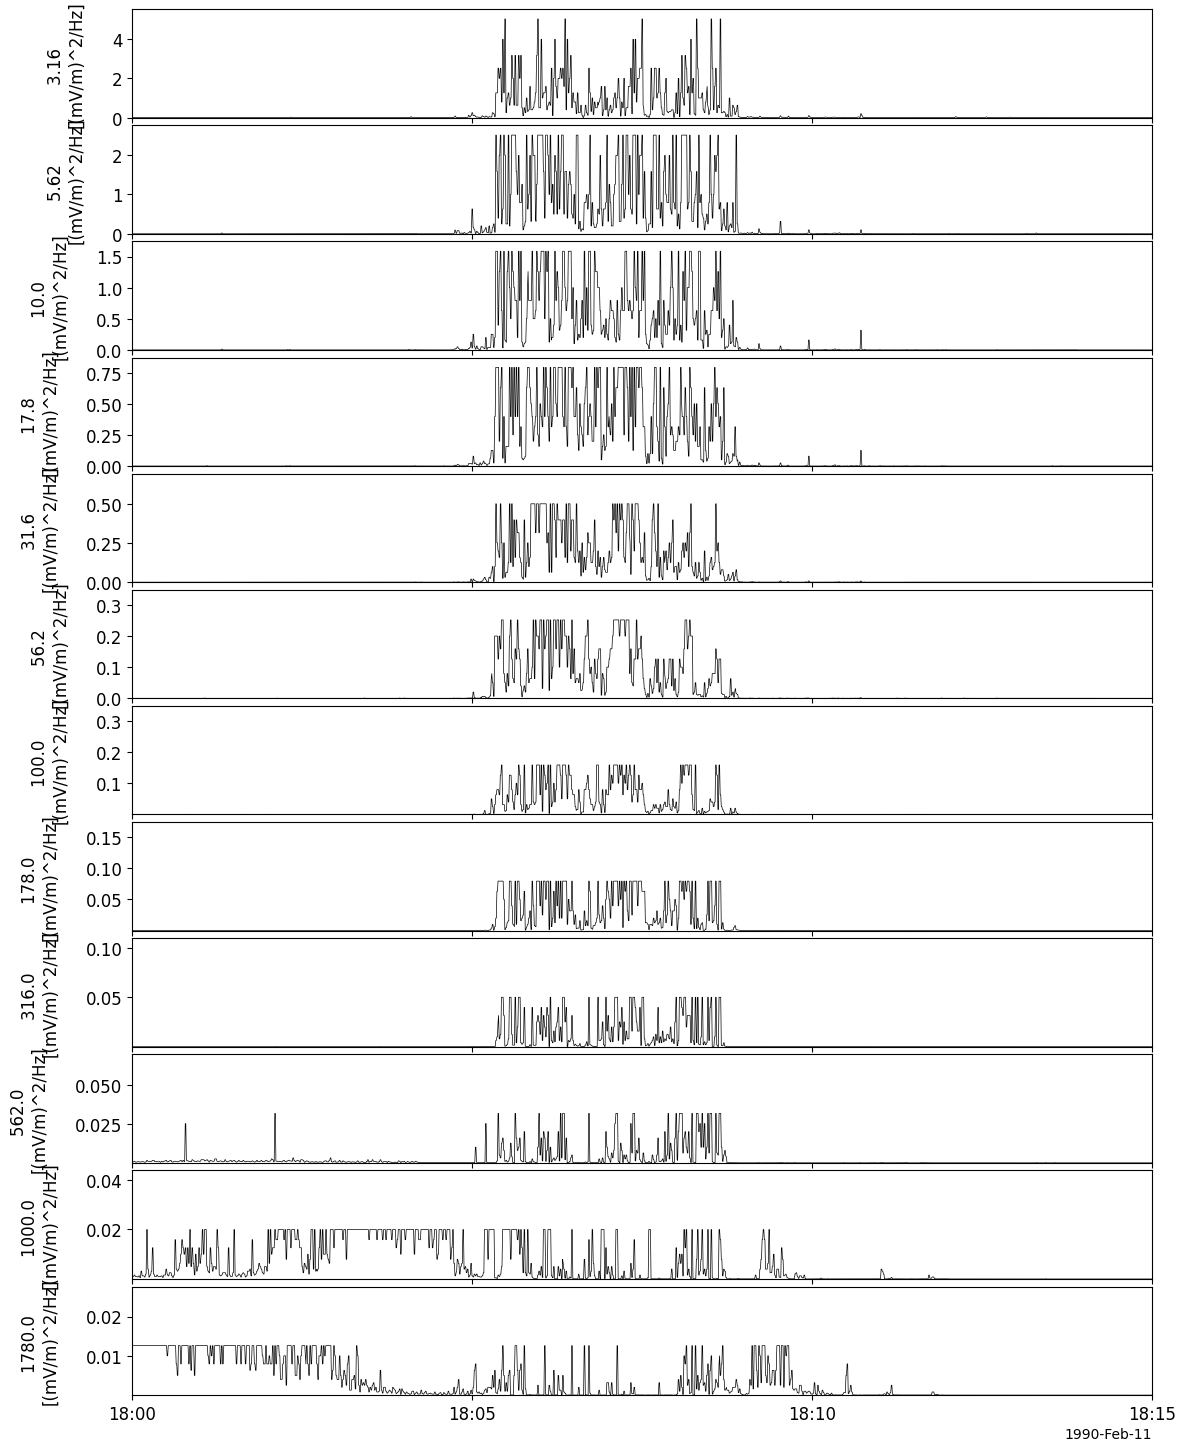

In [19]:
pytplot.tlimit(['1990-2-11 18:00:00', '1990-2-11 18:15:00'])
pytplot.tplot(['akb_mca_Epwr_ch1',
               'akb_mca_Epwr_ch2',
               'akb_mca_Epwr_ch3',
               'akb_mca_Epwr_ch4',
               'akb_mca_Epwr_ch5',
               'akb_mca_Epwr_ch6',
               'akb_mca_Epwr_ch7',
               'akb_mca_Epwr_ch8',
               'akb_mca_Epwr_ch9',
               'akb_mca_Epwr_ch10',
               'akb_mca_Epwr_ch11',
               'akb_mca_Epwr_ch12'], ysize=18)


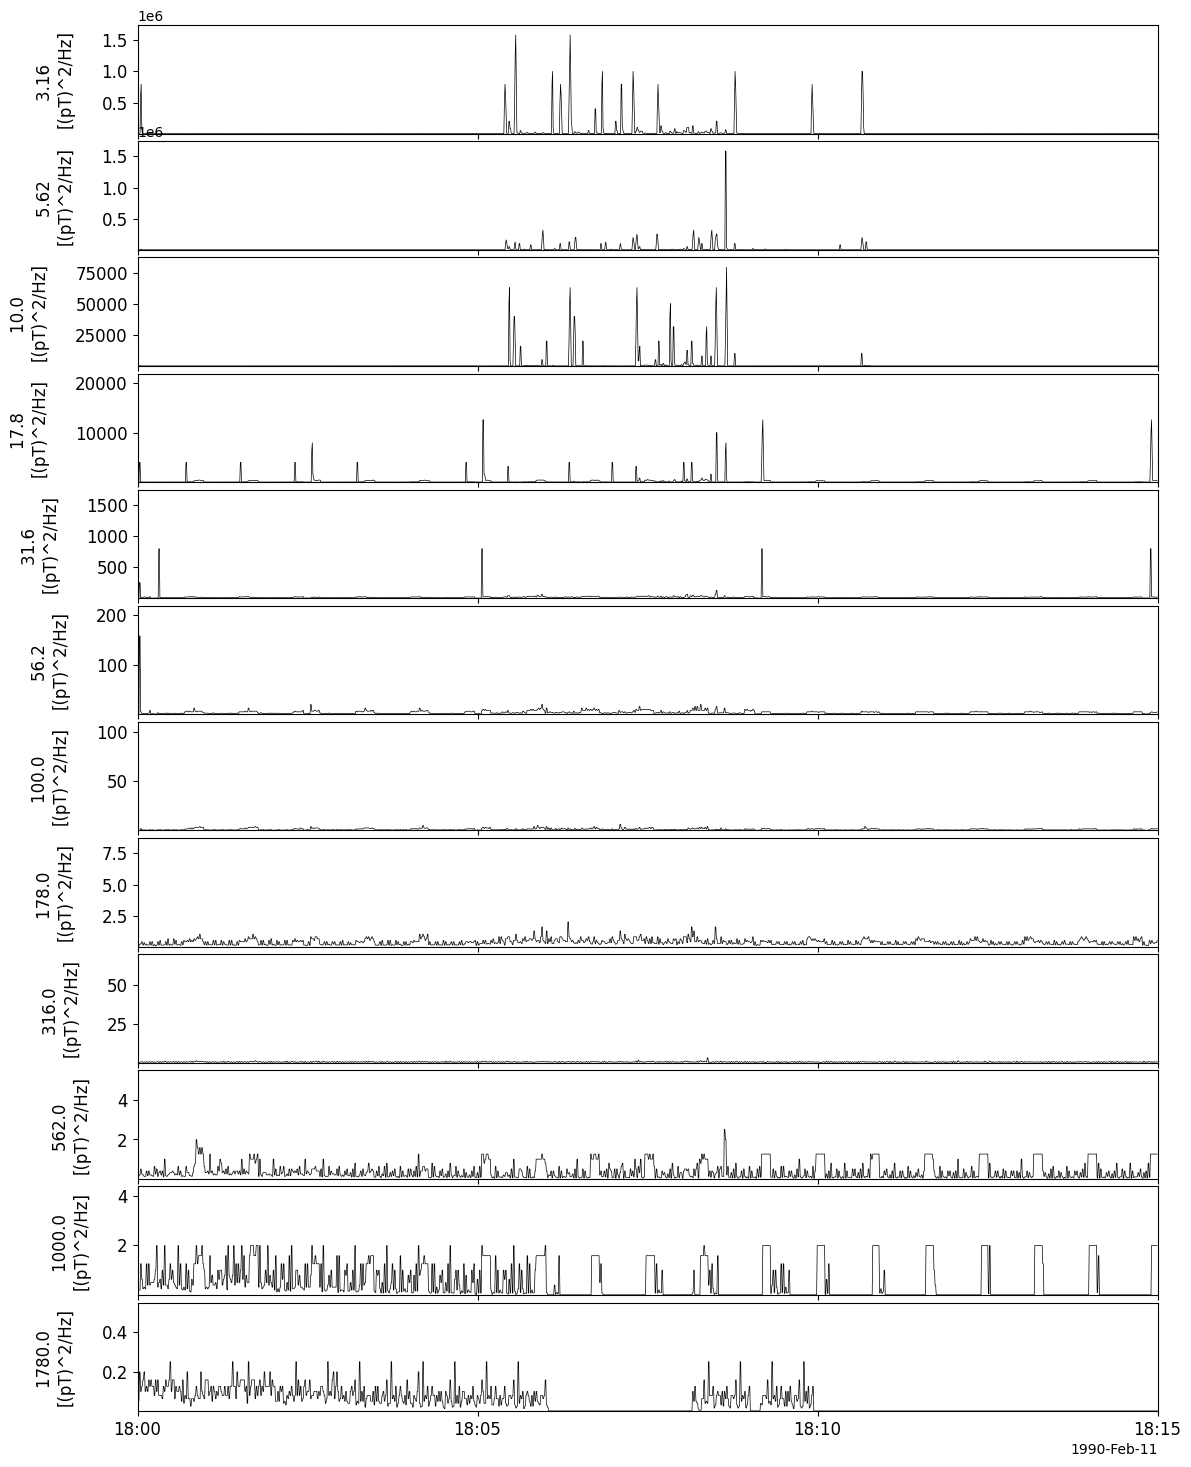

In [20]:
pytplot.tplot(['akb_mca_Bpwr_ch1',
               'akb_mca_Bpwr_ch2',
               'akb_mca_Bpwr_ch3',
               'akb_mca_Bpwr_ch4',
               'akb_mca_Bpwr_ch5',
               'akb_mca_Bpwr_ch6',
               'akb_mca_Bpwr_ch7',
               'akb_mca_Bpwr_ch8',
               'akb_mca_Bpwr_ch9',
               'akb_mca_Bpwr_ch10',
               'akb_mca_Bpwr_ch11',
               'akb_mca_Bpwr_ch12'], ysize=18)


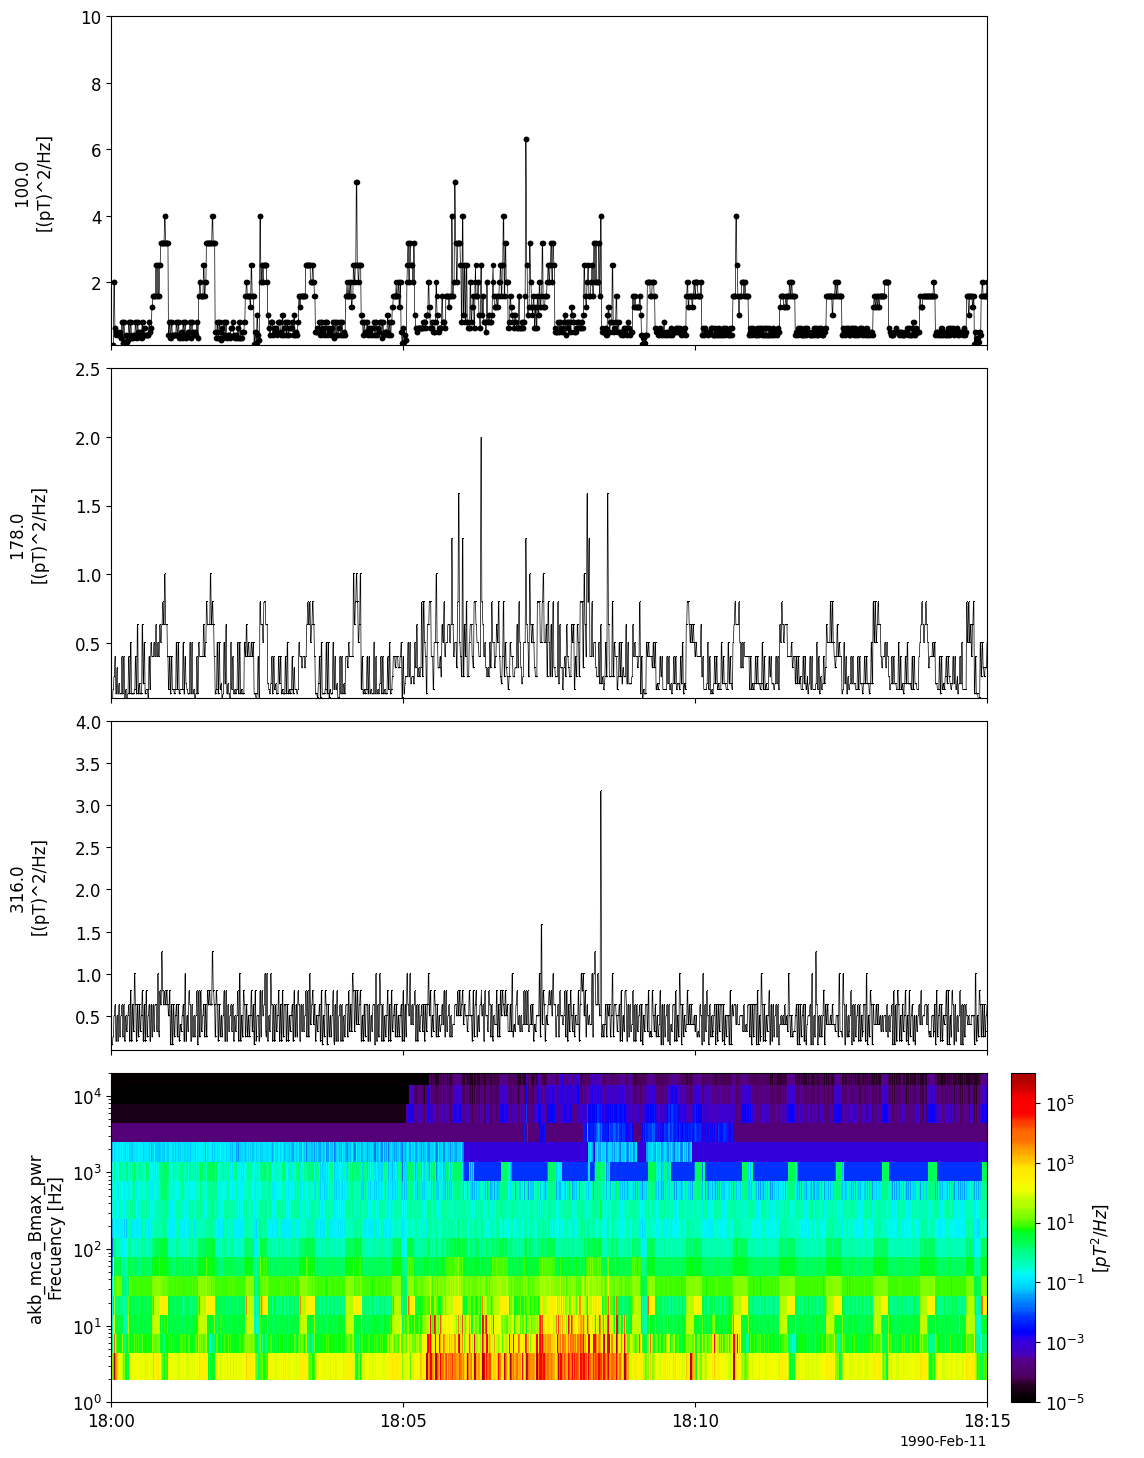

In [21]:
pytplot.options('akb_mca_Bpwr_ch7', opt_dict={'yrange':[0.1, 10], 'marker':'.'})
pytplot.options('akb_mca_Bpwr_ch8', opt_dict={'yrange':[0.1, 2.5], 'marker':','})
pytplot.options('akb_mca_Bpwr_ch9', opt_dict={'yrange':[0.1, 4], 'marker':','})
pytplot.tplot(['akb_mca_Bpwr_ch7',
               'akb_mca_Bpwr_ch8',
               'akb_mca_Bpwr_ch9',
               'akb_mca_Bmax_pwr'], ysize=18)


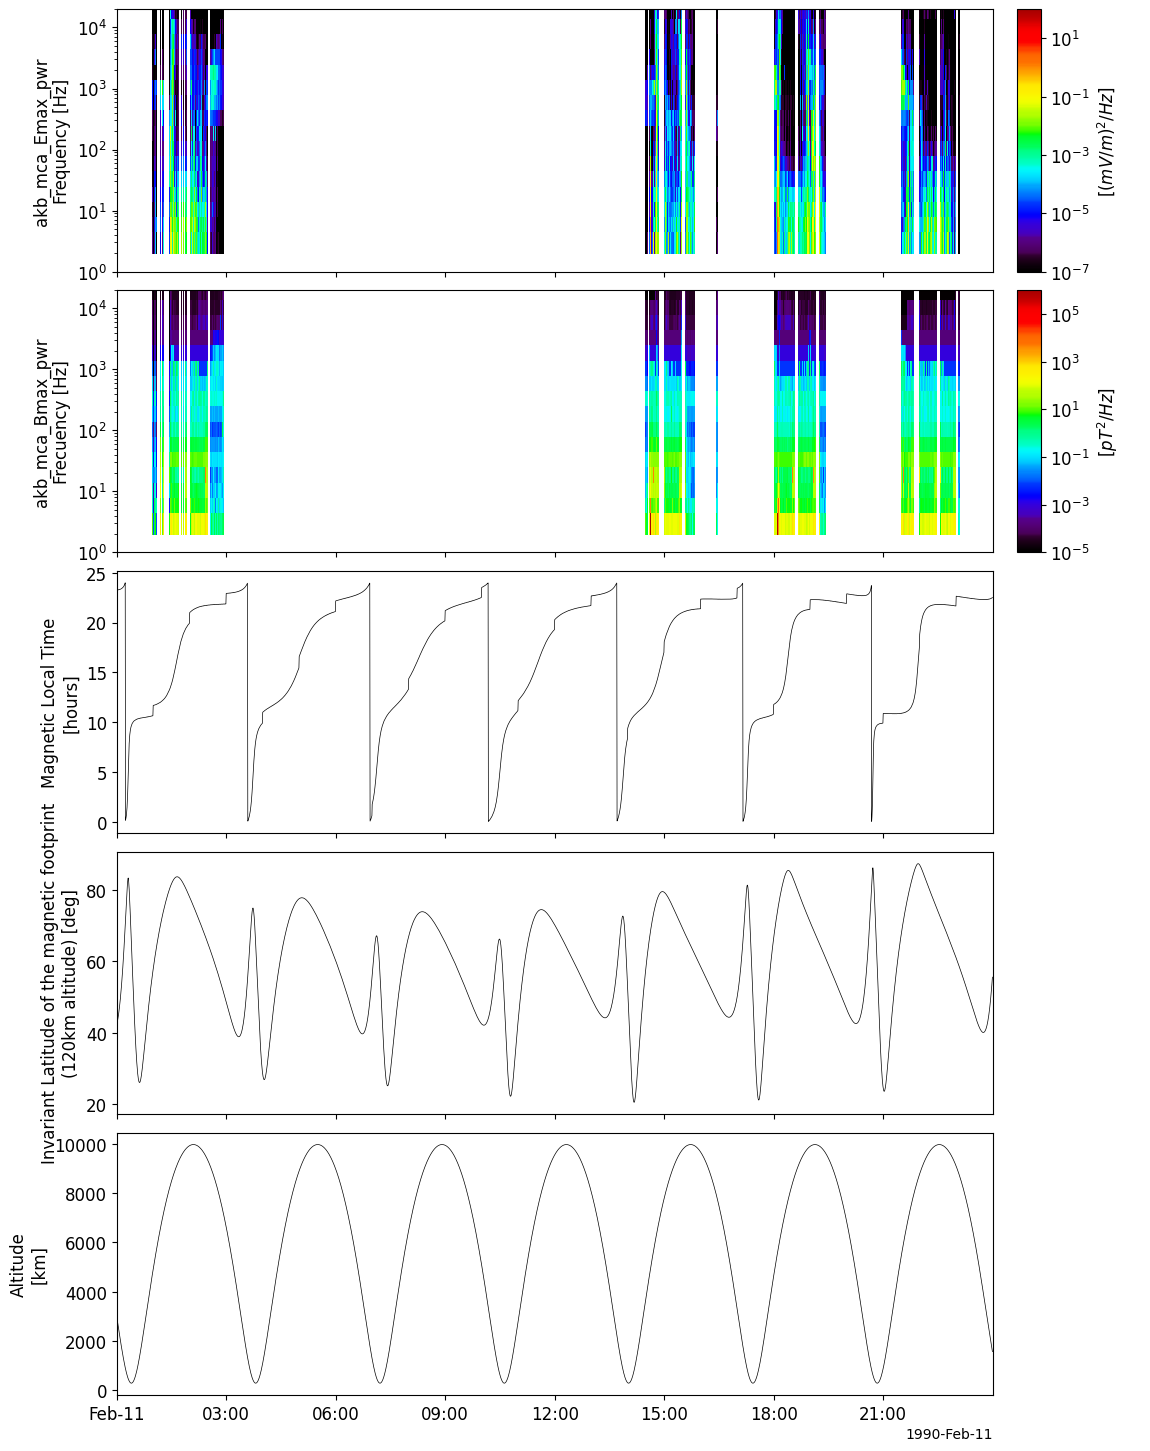

In [11]:
pytplot.tlimit(['1990-2-11 00:00:00', '1990-2-11 23:59:59'])
pytplot.tplot(['akb_mca_Emax_pwr', 'akb_mca_Bmax_pwr', 'akb_orb_mlt', 'akb_orb_inv', 'akb_orb_alt'],
              ysize=18)


07-Oct-23 01:53:27: /Document/akebono_analysis/.venv/lib/python3.10/site-packages/pytplot/MPLPlotter/tplot.py:427: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  xaxis_ticks_dt = [np.datetime64(mpl.dates.num2date(tick_val).isoformat()) for tick_val in xaxis_ticks]

07-Oct-23 01:53:27: /Document/akebono_analysis/.venv/lib/python3.10/site-packages/pytplot/MPLPlotter/tplot.py:622: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  out_ticks.append('{:.2f}'.format(var_xr.interp(coords={'time': time}, kwargs={'fill_value': 'extrapol

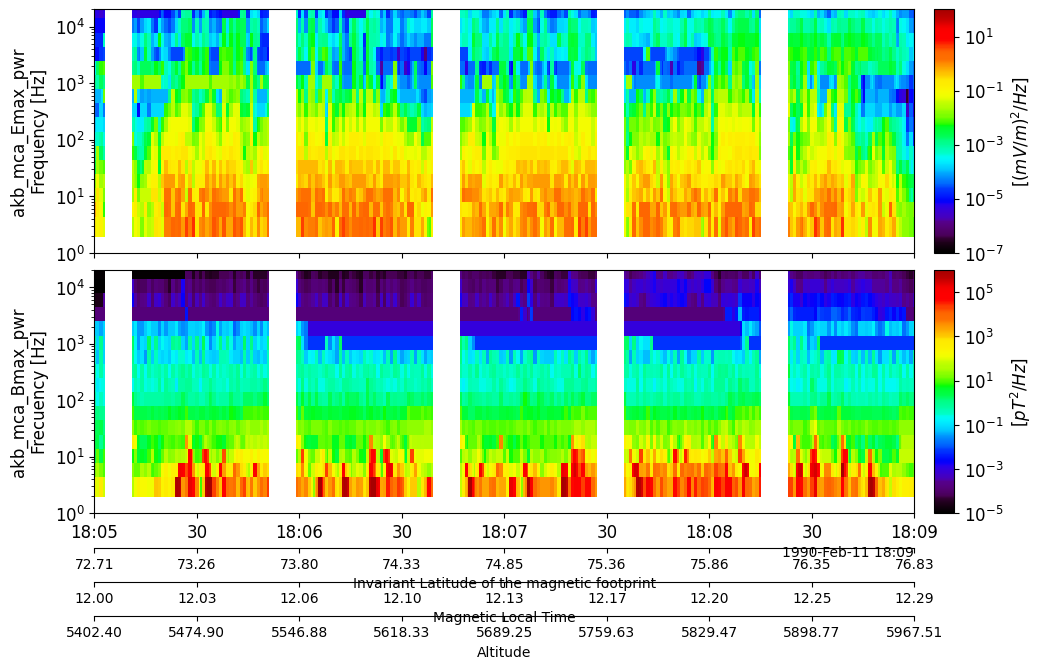

In [ ]:
pytplot.tlimit(['1990-02-11 18:05:00', '1990-02-11 18:9:00'])
pytplot.tplot(['akb_mca_Emax_pwr', 'akb_mca_Bmax_pwr'],
              var_label=['akb_orb_inv', 'akb_orb_mlt', 'akb_orb_alt'], xsize=10, ysize=8)


In [ ]:
pytplot.options(['angle_b0_Ey', 'angle_b0_B'], 'panel_size', 0.5)


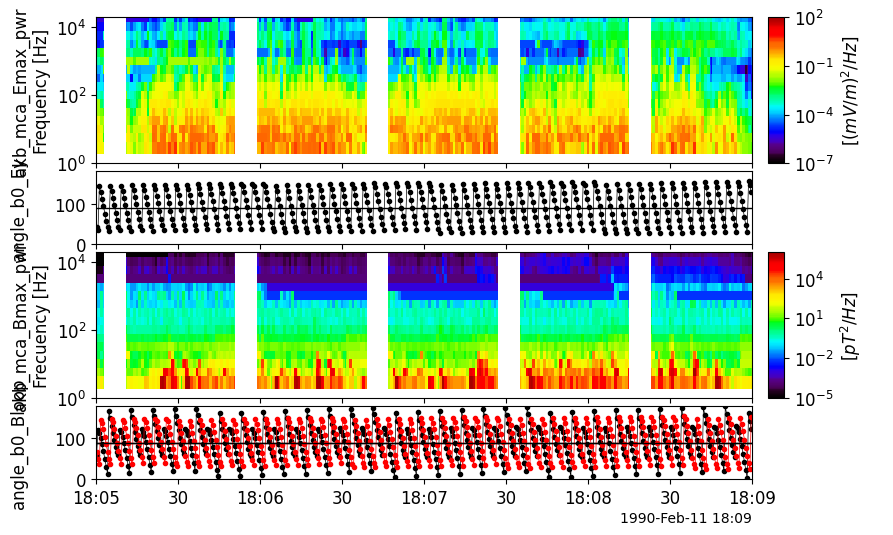

In [ ]:
pytplot.tlimit(['1990-02-11 18:05:00', '1990-02-11 18:9:00'])
pytplot.tplot(['akb_mca_Emax_pwr', 'angle_b0_Ey', 'akb_mca_Bmax_pwr', 'angle_b0_B'],
              xsize=8, ysize=6)


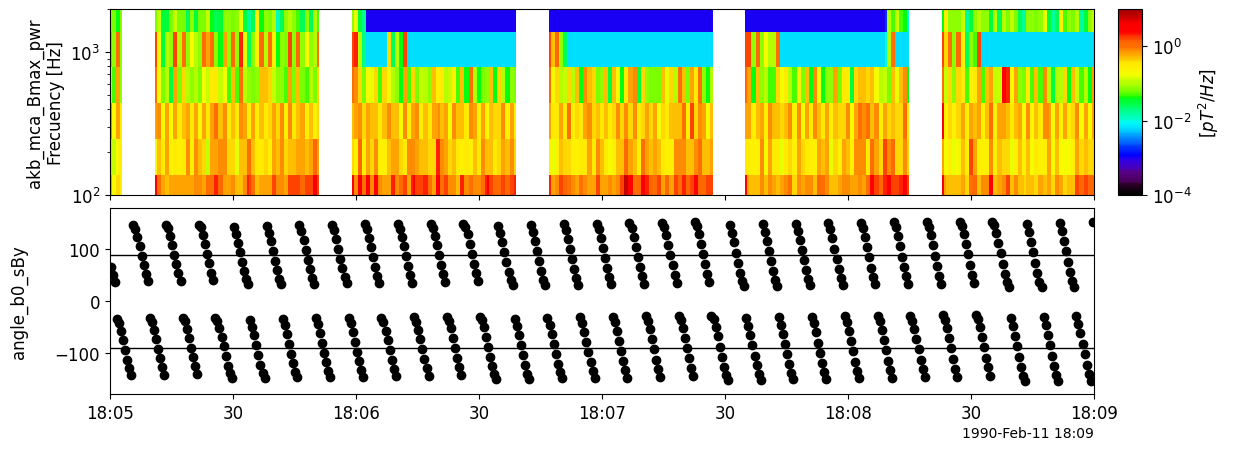

In [ ]:
pytplot.options('akb_mca_Bmax_pwr', opt_dict={'yrange':[100, 2000], 'zrange':[1e-4, 10]})
pytplot.tlimit(['1990-02-11 18:05:00', '1990-02-11 18:09:00'])
pytplot.tplot(['akb_mca_Bmax_pwr', 'angle_b0_sBy'])


line spectrum of mca data

In [ ]:
import akebono
akebono.vlf_mca(trange=['1990-02-11', '1990-02-12'], datatype='pwr', del_invalid_data=['sms', 'off', 'noisy', 'bdr', 'bit rate m'])


31-May-23 19:51:34: Local file: ../akebono_data/vlf/mca/h1/ave8s/1990/ak_h1_mca_19900211_v02.cdf exists.


['akb_mca_Emax_pwr',
 'akb_mca_Bmax_pwr',
 'akb_mca_Eave_pwr',
 'akb_mca_Bave_pwr']

In [ ]:
import pytplot
bpwr = pytplot.get_data('akb_mca_Bmax_pwr', xarray=True)
bpwr


<xarray.DataArray 'akb_mca_Bmax_pwr' (time: 10800, v_dim: 16)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * time       (time) datetime64[ns] 1990-02-11T00:00:04 ... 1990-02-11T23:59:56
    spec_bins  (v_dim) float32 3.16 5.62 10.0 17.8 ... 5.62e+03 1e+04 1.78e+04
    v          (v_dim) float32 3.16 5.62 10.0 17.8 ... 5.62e+03 1e+04 1.78e+04
Dimensions without coordinates: v_dim
Attributes:
    plot_options:  {'xaxis_opt': {'axis_label': 'Time', 'crosshair': 'X', 'x_...

In [ ]:
bpwr_sub_ds = bpwr.sel(time=slice('1990-02-11T18:05:00', '1990-02-11T18:09:00'))


In [ ]:
bpwr_sub_ds.


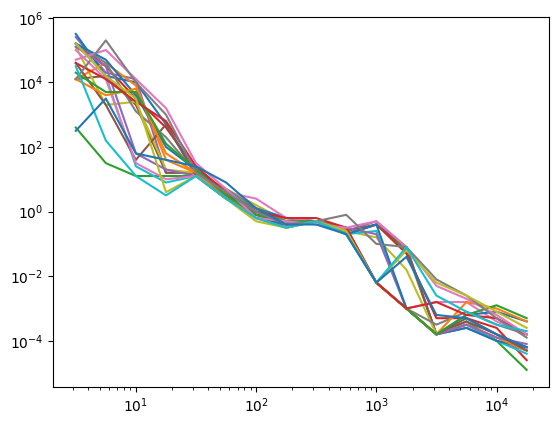

In [ ]:
for i in range(bpwr_sub_ds.data.shape[0]):
    plt.plot(bpwr_sub_ds.coords['spec_bins'].values, bpwr_sub_ds.data[i, :])
plt.yscale('log')
plt.xscale('log')


### E_axis check
- data
    - h0 cdf

In [ ]:
import cdflib
cdf_file =  cdflib.CDF('../akebono_data/vlf/mca/h0/ak_h0_mca_19900211_v01.cdf')

eaxis = cdf_file.varget('E_axis')
epoch = cdf_file.varget('Epoch')


In [ ]:
# epochのほうが長いので、eaxisの長さに合わせる
epoch_sub = epoch[:len(eaxis)]
# epochの値が負の値の時、0で埋める
epoch_sub[epoch_sub < 0] = 0.0


In [ ]:
from preprocess_mgf_epoch import convert_epoch, interpolate_mgf_epoch
epoch_sub_itrp = interpolate_mgf_epoch(epoch_sub)
epoch_datetime = convert_epoch(epoch_sub_itrp)


In [ ]:
epoch_datetime


array(['1990-02-11T00:00:00.118000000', '1990-02-11T00:00:00.368000000',
       '1990-02-11T00:00:00.618000000', ...,
       '1990-02-11T23:23:11.791000000', '1990-02-11T23:23:12.041000000',
       '1990-02-11T23:23:12.291000000'], dtype='datetime64[ns]')

In [ ]:
import xarray as xr
data = xr.DataArray(eaxis, dims=['Epoch'], coords={'Epoch':epoch_datetime})


In [ ]:
data


<xarray.DataArray (Epoch: 336770)>
array([' ', ' ', ' ', ..., 'y', 'y', 'x'], dtype='<U1')
Coordinates:
  * Epoch    (Epoch) datetime64[ns] 1990-02-11T00:00:00.118000 ... 1990-02-11...

In [ ]:
sub_dataarray = data.sel(Epoch=slice('1990-02-11T18:05:00', '1990-02-11T18:06:30'))
sub_dataarray


<xarray.DataArray (Epoch: 364)>
array(['y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y',
       'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y',
       'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y',
       'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y',
       'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y',
       'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y',
       'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y',
       'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y',
       'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y',
       'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y',
       'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y',
       'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y',
       'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y',
       'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y',
       'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y',
       'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y',
       'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y',
       'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y',
       'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y',
       'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y',
       'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y',
       'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y',
       'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y',
       'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y',
       'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y',
       'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y',
       'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y',
       'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y'],
      dtype='<U1')
Coordinates:
  * Epoch    (Epoch) datetime64[ns] 1990-02-11T18:05:00.239000 ... 1990-02-11...

polarization plane

In [ ]:
from plot_projected_polarization_plane import plot_projected_polarization_plane
plot_projected_polarization_plane(30, 30, 0, 100, 'r')


[ 2.0943951   2.0932331   2.08975641  2.08399268  2.07598705  2.06580077
  2.05350941  2.03920089  2.02297323  2.00493239  1.98519014  1.96386214
  1.94106619  1.91692083  1.89154415  1.8650529   1.83756183  1.80918331
  1.7800271   1.75020027  1.71980735  1.68895052  1.65772987  1.62624383
  1.59458953  1.56286326  1.53116097  1.49957872  1.46821317  1.43716203
  1.40652452  1.37640174  1.34689699  1.31811607  1.2901674   1.26316203
  1.23721358  1.21243787  1.1889524   1.16687562  1.14632587  1.12742007
  1.11027216  1.09499127  1.08167966  1.07043057  1.06132602  1.05443466
  1.04980987  1.0474882  -1.0474882  -1.04980987 -1.05443466 -1.06132602
 -1.07043057 -1.08167966 -1.09499127 -1.11027216 -1.12742007 -1.14632587
 -1.16687562 -1.1889524  -1.21243787 -1.23721358 -1.26316203 -1.2901674
 -1.31811607 -1.34689699 -1.37640174 -1.40652452 -1.43716203 -1.46821317
 -1.49957872 -1.53116097 -1.56286326 -1.59458953 -1.62624383 -1.65772987
 -1.68895052 -1.71980735 -1.75020027 -1.7800271  -1.